#Longer computing task
####Student ID : 15019455
####Last updated : 19/11/2015

##Introduction

In this experiment a cathode ray tube was used to accelerate a beam of electron through a voltage $V$. The electron beam was then bent into a circular path with radius $r$. The radius of the beam was measured by two students by using a ruler.
However for two of the measurements one student making measurements was distracted by a Seagull flying past the window and so a larger uncertainty was given to these two measurements. For this reason I am calculating weighted and unweighted values for $\frac{e}{m}$.

In this notebook I am going to calculate values for the charge of an electron divided by its mass, $\frac{e}{m}$, from the gradients of my weighted and unweighted graphs produced by the two students' results.

These equations for energy in $eV$ of an electron, circular motion and the force on the electrons in a magnetic field will be used:

$$ \frac{1}{2}mV^2 = eV $$

$$ F_r = evB = \frac{mv^2}{r} $$


By using these two equations we can form a linear relationship between $ \sqrt{V} $ and $ r $. By using the following equation:

$$ r = \sqrt{\frac{2m}{B^2e}}\sqrt{V} $$

By using this equation we can plot $ r $ against $ \sqrt{V} $. This should give a straight line graph and the gradient of the graph would be equal to $ \sqrt{\frac{2m}{B^2e}} $.

We can rearrange this to give the following equation which will be used to determine the values for $\frac{e}{m}$ ('$g$' is the slope of either graph):

$$ \frac{e}{m} = \frac{2}{g^2B^2} $$

In [1]:
import numpy as np
#I have imported numpy so that its functions can be used

import matplotlib.pyplot as plt
#I have imported matplotlib so that I can use this module to plot graphs

%matplotlib inline
#I have used this command to tell matplotlib to plot the graphs in line with the notebook

from IPython.display import display, Math, Latex

####Data import

In [2]:
Vdata, Rdata, Rerror = np.loadtxt("eovermdata.csv", unpack=True, delimiter = ',') 
#I have unpacked and imported the students' data from the .csv file and have assigned values

print Vdata
print Rdata
print Rerror
#I have printed the arrays made from the table just for reference to calculations

[ 160.  180.  200.  220.  240.  260.  280.  300.]
[ 0.0338  0.0358  0.0389  0.0413  0.041   0.0423  0.0438  0.045 ]
[ 0.00169   0.00179   0.0075    0.0075    0.00205   0.002115  0.00219
  0.00225 ]


####Assigning values

Here I have assigned values which will be used later on in the calculations for certain quantities.

In [3]:
xdata = np.sqrt(Vdata)
#x-axis data points to be used on graphs

ydata = Rdata
#y-axis data points to be used on graphs

yerror = Rerror
#Error in y points

w = yerror**(-2)
#A value which will be used in the calculation of the weighted slope and intercept and hence the corresponding value for e/m

n = 8.0
#This is the number of data points
#This will be used in calculations
#Printed as a float so that when used a float format result is outputted and not integer or other type

mean_x = np.mean(xdata)
mean_y = np.mean(ydata)
#Mean values of x and y data points to be used in calculations

B = 1.28 * 10**(-3)
B_error = 0.01 * 10**(-3)
#The value and error for the magnetic field (in Tesla) used in students' experiment

##Graphs

I have plotted below the unweighted, weighted and combined graphs respectively.

####Unweighted graph equations

This is my unweighted graph. I have used the following equations.

To calculate unweighted gradient, $g_{1}$:

$$ g_{1} = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} $$

To calculate uncertainty in gradient, $\Delta{g_{1}}$:

$$ \Delta{g_{1}} \approx \sqrt{\frac{\sum d_i^2}{(n-2)\sum (x_i - \bar{x})^2}} $$

To calculate intercept, $c_{1}$:

$$ c_{1} = \bar{y} - g_{1} \bar{x} $$

To calculate uncertainty in intercept, $\Delta{c_{1}}$:

$$ \Delta{c_{1}} \approx \sqrt{\left(\frac{1}{n} + \frac{\bar{x}^2}{\sum (x_i - \bar{x})^2}\right)\frac{\sum d_i^2}{n-2}} $$

####Unweighted graph

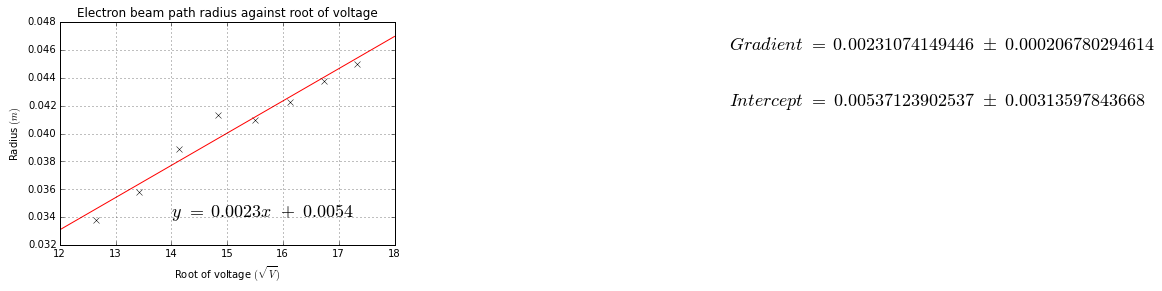

In [4]:
plt.plot(xdata, ydata, 'kx')
#I have plotted the x and y data points and have used blue cross as markers

plt.xlabel('Root of voltage $(\sqrt{V})$')
plt.ylabel('Radius $(m)$')
plt.title('Electron beam path radius against root of voltage')
plt.savefig('Unweighted plot.pdf')
#Here I have labelled the axis and title

slope = np.sum((xdata - mean_x)*ydata) / np.sum((xdata - mean_x)*xdata)
intercept = mean_y - slope*mean_x
slope_error = np.sqrt((np.sum((ydata - slope*xdata - intercept)**2))/(np.sum((xdata - mean_x)**2)*(n - 2)))
intercept_error = np.sqrt(((1.0/n)+((mean_x**2)/(np.sum((xdata - mean_x)**2)))) * ((np.sum((ydata - slope*xdata - intercept)**2))/(n - 2.0)))
#These are my calculations using the above equations

plt.line, = plt.plot([12, 18], [slope*12 + intercept, slope*18 + intercept], 'r-')
#I have plotted a least-squares fit line by using an array for two points calculated from the values above

plt.text(24, 0.046, "$Gradient \, = \, {0} \, \pm \, {1}$".format(slope,slope_error), size=18)
plt.text(24, 0.042, "$Intercept \, = \, {0} \, \pm \, {1}$".format(intercept,intercept_error), size=18)
plt.text(14, 0.034, "$y \, = \, {0:0.4f} x \, + \, {1:0.4f}$".format(slope,intercept), size=18)
#I have added an equation for the line in the form y=gx+c into the graph
#I have also added the unrounded values for the gradient and intercept

plt.grid()
#I have added a grid so that it is easier to see where each point lies

####Unweighted slope and intercept values

In [5]:
print "Gradient =", slope
print "Gradient Uncertainty =", slope_error
print "Intercept =", intercept
print "Intercept Uncertainty =", intercept_error
#These are the precise printed values for the above

Gradient = 0.00231074149446
Gradient Uncertainty = 0.000206780294614
Intercept = 0.00537123902537
Intercept Uncertainty = 0.00313597843668


The rounded values for the above are as follows:

$$ g_{1} = (0.0023 \pm 0.0002) \frac{m}{\sqrt{V}} $$

$$ c_{1} = (0.0054 \pm 0.003)m $$

####Weighted graph equations

This is my unweighted graph. I have used the following equations.

The weight given to each point is:

$$ w_{i} = \frac{1}{(\Delta{y_{i}})^2} $$

To calculate weighted gradient, $g_{2}$:

$$ g_{2} = \frac{\sum w_{i} \sum w_{i}x_{i}y_{i} - \sum w_{i}x_{i} \sum w_{i}y_{i}}{\sum w_{i} \sum w_{i}x_{i}^2 - \left(\sum w_{i}x_{i}\right)^2} $$

To calculate weighted gradient uncertainty, $\Delta{g_{2}}$:

$$ \Delta{g_{2}} = \sqrt{\frac{\sum w_{i}}{\sum w_{i} \sum w_{i}x_{i}^2 - \left(\sum w_{i}x_{i}\right)^2}} $$

To calculate weighted intercept, $c_{1}$:

$$ c_{1} = \frac{\sum w_{i}x_{i}^2 \sum w_{i}y_{i} - \sum w_{i}x_{i} \sum w_{i}x_{i}y_{i}}{\sum w_{i} \sum w_{i}x_{i}^2 - \left(\sum w_{i}x_{i}\right)^2} $$

To calculate weighted intercept uncertainty, $\Delta{c_{1}}$:

$$ \Delta{c_{1}} = \sqrt{\frac{\sum x_{i}^2w_{i}}{\sum w_{i} \sum w_{i}x_{i}^2 - \left(\sum w_{i}x_{i}\right)^2}} $$

####Weighted graph

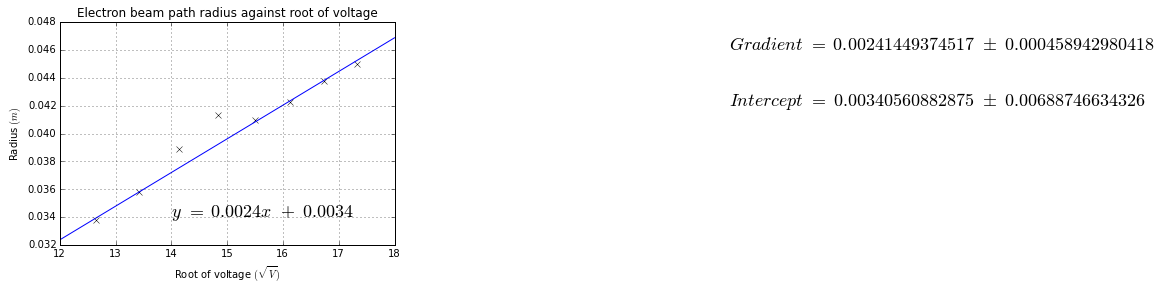

In [6]:
plt.plot(xdata, ydata, 'kx')
#I have plotted the x and y data oints and have used blue cross as markers

plt.xlabel('Root of voltage $(\sqrt{V})$')
plt.ylabel('Radius $(m)$')
plt.title('Electron beam path radius against root of voltage')
plt.savefig('Weighted plot.pdf')
#Here I have labelled the axis and title

wslope = (np.sum(w)*np.sum(w*xdata*ydata)-np.sum(w*xdata)*np.sum(w*ydata))/(np.sum(w)*np.sum(w*xdata**2)-np.sum(w*xdata)**2)
wslope_error = np.sqrt((np.sum(w))/(np.sum(w)*np.sum(w*xdata**2)-np.sum(w*xdata)**2))
wintercept = (np.sum(w*xdata**2)*np.sum(w*ydata)-np.sum(w*xdata)*np.sum(w*xdata*ydata))/(np.sum(w)*np.sum(w*xdata**2)-np.sum(w*xdata)**2)
wintercept_error = np.sqrt((np.sum(w*xdata**2))/(np.sum(w)*np.sum(w*xdata**2)-np.sum(w*xdata)**2))
#These are my calculations using the above equations

plt.line, = plt.plot([12, 18], [wslope*12 + wintercept, wslope*18 + wintercept], 'b-')
#I have plotted a least-squares fit line by using an array for two points calculated from the values above

plt.text(24, 0.046, "$Gradient \, = \, {0} \, \pm \, {1}$".format(wslope,wslope_error), size=18)
plt.text(24, 0.042, "$Intercept \, = \, {0} \, \pm \, {1}$".format(wintercept,wintercept_error), size=18)
plt.text(14, 0.034, "$y \, = \, {0:0.4f} x \, + \, {1:0.4f}$".format(wslope,wintercept), size=18)
#I have added an equation for the line in the form y=gx+c into the graph
#I have also added the unrounded values for the gradient and intercept

plt.grid()
#I have added a grid so that it is easier to see where each point lies

####Weighted slope and intercept values

In [7]:
print "Gradient =", wslope
print "Gradient Uncertainty =",wslope_error
print "Intercept =", wintercept
print "Intercept Uncertainty =", wintercept_error
#These are the precise printed values for the above

Gradient = 0.00241449374517
Gradient Uncertainty = 0.000458942980418
Intercept = 0.00340560882875
Intercept Uncertainty = 0.00688746634326


The rounded values for the above are as follows:

$$ g_{2} = (0.0024 \pm 0.0005) \frac{m}{\sqrt{V}} $$

$$ c_{2} = (0.0034 \pm 0.007)m $$

####Combined graph

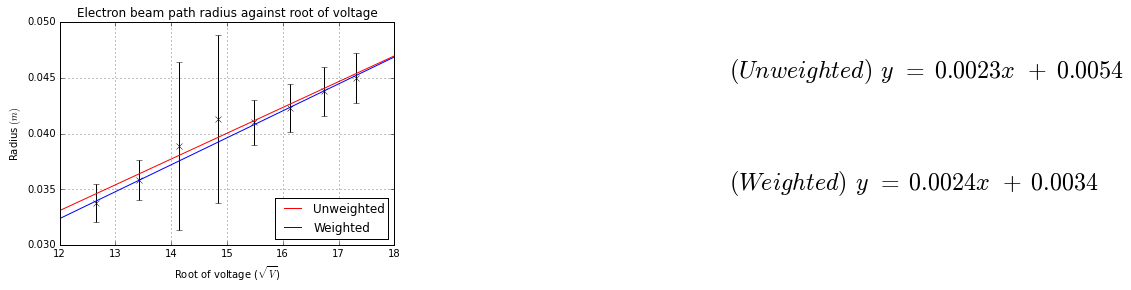

In [8]:
plt.errorbar(xdata, ydata, yerr = yerror, fmt='kx')
#I have plotted the original x and y data points with error bars from the students' data

plt.xlabel('Root of voltage ($\sqrt{V}$)')
plt.ylabel('Radius $(m)$')
plt.title('Electron beam path radius against root of voltage')
plt.savefig('Combined plot.pdf')
#Here I have labelled the axis and title
#I Have also outputted the graph as pdf

plt.line, = plt.plot([12, 18], [slope*12 + intercept, slope*18 + intercept], 'r-', label="Unweighted")
plt.line, = plt.plot([12, 18], [wslope*12 + wintercept, wslope*18 + wintercept], 'b-', label="Weighted")
#I have plotted both the unweighted and weighted line on this graph 

plt.legend(loc="best")
#I have added a legend so that both the weighted and unweighted lines can be distinguished

plt.text(24, 0.045, "$(Unweighted) \, y \, = \, {0:0.4f} x \, + \, {1:0.4f}$".format(slope,intercept), size=24)
plt.text(24, 0.035, "$(Weighted) \, y \, = \, {0:0.4f} x \, + \, {1:0.4f}$".format(wslope,wintercept), size=24)
#These are the equations for both lines

plt.savefig('15019455.pdf')
#This is to save the final combined graph as a .pdf

plt.grid()
#I have added a grid so that it is easier to see where each point lies

##Results

The weighted and unweighted values and uncertainties for $\frac{e}{m}$ are calculated from the following equations.

In order to calculate the desired value, $\frac{e}{m}$, we use this equation:

$$ \frac{e}{m} = \frac{2}{g^2B^2} $$

And to calculate the uncertainty, $\Delta{\left( \frac{e}{m} \right)}$, I used the general equation below which only works for small uncertainties of the function $Z=Z(A,B,C...)$, this function can have many variables:

$$ \left(\Delta{Z}\right)^2 \approx \left(\frac{\partial Z}{\partial A}\right)^2\left(\Delta{A}\right)^2 + \left(\frac{\partial Z}{\partial B}\right)^2\left(\Delta{B}\right)^2 + \left(\frac{\partial Z}{\partial C}\right)^2\left(\Delta{C}\right)^2...$$

Therefore from the above equation we get:

$$ \left(\Delta{\left( \frac{e}{m} \right)}\right)^2 \approx \left(\frac{\partial \Delta{\left( \frac{e}{m} \right)}}{\partial g}\right)^2\left(\Delta{g}\right)^2 + \left(\frac{\partial \Delta{\left( \frac{e}{m} \right)}}{\partial B}\right)^2\left(\Delta{B}\right)^2 $$

Which can be evaluated into a final equation which gives the uncertainty for $\Delta{\left( \frac{e}{m} \right)}$:

$$ \Delta{\left( \frac{e}{m} \right)} \approx 2\frac{e}{m}\sqrt{\left(\frac{\Delta{g}}{g}\right)^2 + \left(\frac{\Delta{B}}{B}\right)^2} $$

You may also note that the value for $\frac{e}{m}$ is given as a negative, this is because the value for $e$ is negative and $m$ is posotive.

####Unweighted $\frac{e}{m}, \left(\frac{e}{m}\right)_{1}$

In [9]:
#Unweighted

eom1 = (2)/((slope * B)**2)
eom1_error = 2.0 * eom1 * np.sqrt(((slope_error)/(slope))**2 + ((B_error)/(B))**2)
#This is the value and uncertainty for e/m calculated by using the above stated equations

print "e/m =", eom1
print "e/m Uncertainty =", eom1_error
#These are the precise printed values for the above

e/m = 228616372854.0
e/m Uncertainty = 41071816983.7


The rounded values for the unweighted $\frac{e}{m}$ are as follows:

$$ \left(\frac{e}{m}\right)_{1} = (-2.3 \pm 0.4)\times 10^{11} \frac{C}{kg} $$

####Weighted $\frac{e}{m}, \left(\frac{e}{m}\right)_{2}$

In [10]:
#Weighted

eom2 = (2)/((wslope * B)**2)
eom2_error = 2.0 * eom2 * np.sqrt(((wslope_error)/(wslope))**2 + ((B_error)/(B))**2)
#This is the value and uncertainty for e/m calculated by using the above stated equations

print "e/m =", eom2
print "e/m Uncertainty =", eom2_error
#These are the precise printed values for the above

e/m = 209390940221.0
e/m Uncertainty = 79668575832.6


The rounded values for the weighted $\frac{e}{m}$ are as follows:

$$ \left(\frac{e}{m}\right)_{2} = (-2.1 \pm 0.8)\times 10^{11} \frac{C}{kg} $$

####Accepted value for $\frac{e}{m}, \frac{e}{m}$

The accepted value for $\frac{e}{m}$ from CODATA Fundamental Constants 2014 is:

$$ \frac{e}{m} = (-1.75882002 \pm 0.00000001)\times 10^{11} \frac{C}{kg} $$

##Brief Conclusion

The value $\left(\frac{e}{m}\right)_{1}$, the unweighted $\frac{e}{m}$, does not actually agree with the accepted value for $\frac{e}{m}$ because its range (uncertainty) does not include the accepted value of $\frac{e}{m}$.
However the value for $\left(\frac{e}{m}\right)_{2}$, the weighted $\frac{e}{m}$, does include the accepted value of $\frac{e}{m}$ in its range.
And so we can assume the weighted $\frac{e}{m}$ to be accurate while the unweighted $\frac{e}{m}$ is not assumed accurate, this relies on the assumption that the accepted value for $\frac{e}{m}$ is the true value.

Also from the weighted, unweighted and accepted $\frac{e}{m}$ we can say that the accepted value has a very high precision as it is stated reliable to 8 decimal points while the weighted and unweighted values are only stated reliable to 1 decimal point.

Overall if the two readings with large uncertainties (when student was distracted by the Seagull) are accounted for by using a weighted value then the students' results accord and are in the same magnitude with the accepted value.